In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import roc_auc_score
import time
from datetime import datetime
from sklearn.preprocessing import StandardScaler

c:\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Посмотрим на данные

In [5]:
df = pd.read_csv('data/features.csv', index_col='match_id')

In [6]:
X = df.copy()
X.drop(X.columns[-4:], axis = 1, inplace = True)
X.drop(X.columns[-2], axis = 1, inplace = True)
X.drop(X.columns[-1], axis = 1, inplace = True)
X.head(15)

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,r5_kills,r5_deaths,r5_items,d1_hero,d1_level,d1_xp,d1_gold,d1_lh,d1_kills,d1_deaths,d1_items,d2_hero,d2_level,d2_xp,d2_gold,d2_lh,d2_kills,d2_deaths,d2_items,d3_hero,d3_level,d3_xp,d3_gold,d3_lh,d3_kills,d3_deaths,d3_items,d4_hero,d4_level,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,67,3,842,991,10,0,0,4,29,5,1909,1143,10,0,0,8,20,3,757,741,6,0,0,7,105,3,732,658,4,0,1,11,4,3,1058,996,12,0,0,6,42,4,1085,986,12,0,0,4,21,5,2052,1536,23,0,0,6,37,3,742,500,2,0,0,8,84,3,958,1003,3,1,0,9,7.0,1.0,9.0,NaN,134.0,-80.0,244.0,2,2,2,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1430220345,0,42,4,1188,1033,9,0,1,12,49,4,1596,993,10,0,1,7,67,4,1506,1502,18,1,0,7,37,3,669,631,7,0,0,7,26,2,415,539,1,0,0,5,39,5,1960,1384,16,0,0,8,88,3,640,566,1,0,1,5,79,3,720,1350,2,2,0,12,7,2,440,583,0,0,0,7,12,4,1470,1622,24,0,0,9,54.0,1.0,7.0,NaN,173.0,-80.0,NaN,2,0,2,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,1430227081,7,33,4,1319,1270,22,0,0,12,98,3,1314,775,6,0,0,6,20,3,1297,909,0,1,0,6,27,5,2360,2096,26,1,1,6,4,3,1395,1627,27,0,0,9,22,5,2305,2028,19,1,1,10,66,3,1024,959,19,0,1,10,86,3,755,620,3,0,0,8,29,4,1319,667,4,0,0,7,80,3,1350,1512,25,0,0,7,224.0,0.0,3.0,NaN,63.0,-82.0,NaN,2,5,2,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,1430263531,1,29,4,1779,1056,14,0,0,5,30,2,539,539,1,0,0,6,75,5,2037,1139,15,0,0,6,37,2,591,499,0,0,0,6,41,3,712,1075,12,0,0,6,96,5,1878,1174,17,0,0,6,48,3,732,1468,22,0,0,10,15,4,1681,1051,11,0,0,7,102,2,674,537,1,0,0,7,20,2,510,499,0,0,0,7,NaN,NaN,NaN,NaN,208.0,-75.0,NaN,0,3,2,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,1430282290,7,13,4,1431,1090,8,1,0,8,27,2,629,552,0,0,1,7,30,3,884,927,0,1,0,8,72,3,925,1439,16,1,0,11,93,4,1482,880,7,0,0,8,26,3,704,586,1,0,2,9,69,3,1169,1665,20,1,0,7,22,3,1055,638,1,0,0,9,25,5,1815,1275,18,0,0,8,8,4,1119,904,6,0,1,7,-21.0,1.0,6.0,NaN,166.0,-81.0,181.0,1,4,2,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0
5,1430284186,1,11,5,1961,1461,19,0,1,6,20,2,441,686,4,0,0,5,28,4,1874,1438,22,0,0,4,25,2,528,800,1,1,0,9,65,3,799,785,6,0,1,6,55,3,847,785,7,0,1,7,52,2,455,967,2,1,0,11,3,2,279,916,0,1,0,10,73,5,2065,2565,26,0,0,13,48,5,2029,1781,29,0,0,8,78.0,1.0,7.0,NaN,35.0,-85.0,182.0,5,4,2,1,-27.0,2.0,-86.0,212.0,4,4,4,0,-43.0
8,1430293701,1,8,3,967,1136,7,1,0,8,57,4,1774,1592,19,1,0,8,7,3,904,1119,7,0,1,12,21,4,1523,1061,5,1,1,8,36,2,553,657,1,0,2,10,22,4,1958,1680,19,1,1,9,30,3,1026,704,0,0,1,8,72,3,1161,1668,19,1,0,9,101,3,681,931,6,1,1,13,47,5,2282,1998,30,1,0,16,-34.0,1.0,7.0,NaN,229.0,-77.0,299.0,11,3,3,2,-35.0,6.0,-86.0,182.0,3,6,3,0,10.0
9,1430299335,7,35,5,2117,1252,16,0,0,6,15,3,1378,1430,23,0,0,4,83,2,259,500,0,0,0,6,29,3,825,818,8,0,0,8,101,2,357,500,0,0,0,7,100,2,350,523,0,0,0,9,25,5,2323,1890,25,0,0,7,26,2,310,523,0,0,0,7,44,4,1387,1275,19,0,0,7,96,4,1408,883,8,0,0,7,NaN,NaN,NaN,NaN,NaN,-85.0,NaN,1,2,2,1,26.0,119.0,-61.0,NaN,2,3,4,0,-15.0
11,1430308974,1,17,5,1527,906,10,0,1,7,91,3,733,499,0,0,0,4,53,4,1571,1257,8,1,0,8,72,3,939,1229,18,0,0,4,30,1,310,549,1,0,1,7,90,3,836,790,0,1,0,9,96,3,1046,925,10,0,0,9,35,5,2088,1732,18,1,0,10,19,4,1290,946,11,0,1,5,7,3,952,750

In [3]:
df.head(15)

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,r5_kills,r5_deaths,r5_items,d1_hero,d1_level,d1_xp,d1_gold,d1_lh,d1_kills,d1_deaths,d1_items,d2_hero,d2_level,d2_xp,d2_gold,d2_lh,d2_kills,d2_deaths,d2_items,d3_hero,d3_level,d3_xp,d3_gold,d3_lh,d3_kills,d3_deaths,d3_items,d4_hero,d4_level,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,67,3,842,991,10,0,0,4,29,5,1909,1143,10,0,0,8,20,3,757,741,6,0,0,7,105,3,732,658,4,0,1,11,4,3,1058,996,12,0,0,6,42,4,1085,986,12,0,0,4,21,5,2052,1536,23,0,0,6,37,3,742,500,2,0,0,8,84,3,958,1003,3,1,0,9,7.0,1.0,9.0,NaN,134.0,-80.0,244.0,2,2,2,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,49,4,1596,993,10,0,1,7,67,4,1506,1502,18,1,0,7,37,3,669,631,7,0,0,7,26,2,415,539,1,0,0,5,39,5,1960,1384,16,0,0,8,88,3,640,566,1,0,1,5,79,3,720,1350,2,2,0,12,7,2,440,583,0,0,0,7,12,4,1470,1622,24,0,0,9,54.0,1.0,7.0,NaN,173.0,-80.0,NaN,2,0,2,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,98,3,1314,775,6,0,0,6,20,3,1297,909,0,1,0,6,27,5,2360,2096,26,1,1,6,4,3,1395,1627,27,0,0,9,22,5,2305,2028,19,1,1,10,66,3,1024,959,19,0,1,10,86,3,755,620,3,0,0,8,29,4,1319,667,4,0,0,7,80,3,1350,1512,25,0,0,7,224.0,0.0,3.0,NaN,63.0,-82.0,NaN,2,5,2,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,30,2,539,539,1,0,0,6,75,5,2037,1139,15,0,0,6,37,2,591,499,0,0,0,6,41,3,712,1075,12,0,0,6,96,5,1878,1174,17,0,0,6,48,3,732,1468,22,0,0,10,15,4,1681,1051,11,0,0,7,102,2,674,537,1,0,0,7,20,2,510,499,0,0,0,7,NaN,NaN,NaN,NaN,208.0,-75.0,NaN,0,3,2,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,27,2,629,552,0,0,1,7,30,3,884,927,0,1,0,8,72,3,925,1439,16,1,0,11,93,4,1482,880,7,0,0,8,26,3,704,586,1,0,2,9,69,3,1169,1665,20,1,0,7,22,3,1055,638,1,0,0,9,25,5,1815,1275,18,0,0,8,8,4,1119,904,6,0,1,7,-21.0,1.0,6.0,NaN,166.0,-81.0,181.0,1,4,2,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0,2449,0,4,1974,3,63
5,1430284186,1,11,5,1961,1461,19,0,1,6,20,2,441,686,4,0,0,5,28,4,1874,1438,22,0,0,4,25,2,528,800,1,1,0,9,65,3,799,785,6,0,1,6,55,3,847,785,7,0,1,7,52,2,455,967,2,1,0,11,3,2,279,916,0,1,0,10,73,5,2065,2565,26,0,0,13,48,5,2029,1781,29,0,0,8,78.0,1.0,7.0,NaN,35.0,-85.0,182.0,5,4,2,1,-27.0,2.0,-86.0,212.0,4,4,4,0,-43.0,1453,0,512,2038,0,63
8,1430293701,1,8,3,967,1136,7,1,0,8,57,4,1774,1592,19,1,0,8,7,3,904,1119,7,0,1,12,21,4,1523,1061,5,1,1,8,36,2,553,657,1,0,2,10,22,4,1958,1680,19,1,1,9,30,3,1026,704,0,0,1,8,72,3,1161,1668,19,1,0,9,101,3,681,931,6,1,1,13,47,5,2282,1998,30,1,0,16,-34.0,1.0,7.0,NaN,229.0,-77.0,299.0,11,3,3,2,-35.0,6.0,-86.0,182.0,3,6,3,0,10.0,1968,0,1536,1983,12,63
9,1430299335,7,35,5,2117,1252,16,0,0,6,15,3,1378,1430,23,0,0,4,83,2,259,500,0,0,0,6,29,3,825,818,8,0,0,8,101,2,357,500,0,0,0,7,100,2,350,523,0,0,0,9,25,5,2323,1890,25,0,0,7,26,2,310,523,0,0,0,7,44,4,1387,1275,19,0,0,7,96,4,1408,883,8,0,0,7,NaN,NaN,NaN,NaN,NaN,-85.0,NaN,1,2,2,1,26.0,119.0,

In [4]:
df.describe()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,r5_kills,r5_deaths,r5_items,d1_hero,d1_level,d1_xp,d1_gold,d1_lh,d1_kills,d1_deaths,d1_items,d2_hero,d2_level,d2_xp,d2_gold,d2_lh,d2_kills,d2_deaths,d2_items,d3_hero,d3_level,d3_xp,d3_gold,d3_lh,d3_kills,d3_deaths,d3_items,d4_hero,d4_level,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
count,9.723000e+04,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,77677.000000,77677.000000,77677.000000,53243.000000,81539.000000,96538.000000,69751.000000,97230.000000,97230.000000,97230.000000,97230.000000,95394.000000,81087.000000,96554.000000,71132.000000,97230.000000,97230.000000,97230.000000,97230.000000,95404.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000
mean,1.444232e+09,2.630999,51.517104,3.442672,1233.405801,1147.899702,11.231996,0.357009,0.362285,8.271315,52.183452,3.364661,1189.223676,1107.863993,10.471747,0.348709,0.363550,8.275584,52.710491,3.353924,1182.879965,1099.643742,10.333004,0.342723,0.357338,8.273527,52.648092,3.308896,1159.088481,1082.090240,9.981909,0.337746,0.357307,8.275049,52.625630,3.304237,1158.586167,1082.057061,9.995351,0.337262,0.352782,8.288491,51.990106,3.461123,1238.855765,1151.018184,11.253841,0.372262,0.344091,8.296380,52.708547,3.388933,1199.858809,1108.633436,10.460424,0.356238,0.347012,8.310419,52.755137,3.378638,1193.554438,1103.273702,10.386918,0.353533,0.347732,8.305420,52.922421,3.337725,1171.952155,1088.711653,10.035349,0.354952,0.341860,8.319665,53.059694,3.345274,1177.395351,1089.558850,10.053739,0.356063,0.342538,8.323048,97.688029,0.521815,4.593483,4.383224,126.800255,-80.059510,215.987126,2.994775,3.312527,2.431719,0.716250,-6.875747,127.215028,-80.191893,214.870536,2.965566,3.349553,2.448339,0.689119,-6.901922,2332.247886,0.518503,1309.227790,1286.310820,40.599095,41.337036
std,5.515393e+06,2.835761,32.564211,1.111741,566.588895,464.111662,9.041620,0.663889,0.626704,2.497575,32.674077,1.097536,555.363510,458.001007,8.972073,0.654060,0.624236,2.433864,32.560923,1.092126,554.899600,454.727127,8.950871,0.647774,0.618071,2.440139,32.670519,1.092502,550.937530,450.353291

### Описание признаков в таблице

- `match_id`: идентификатор матча в наборе данных
- `start_time`: время начала матча (unixtime)
- `lobby_type`: тип комнаты, в которой собираются игроки (расшифровка в `dictionaries/lobbies.csv`)
- Наборы признаков для каждого игрока (игроки команды Radiant — префикс `rN`, Dire — `dN`):
    - `r1_hero`: герой игрока (расшифровка в dictionaries/heroes.csv)
    - `r1_level`: максимальный достигнутый уровень героя (за первые 5 игровых минут)
    - `r1_xp`: максимальный полученный опыт
    - `r1_gold`: достигнутая ценность героя
    - `r1_lh`: число убитых юнитов
    - `r1_kills`: число убитых игроков
    - `r1_deaths`: число смертей героя
    - `r1_items`: число купленных предметов
- Признаки события "первая кровь" (first blood). Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение
    - `first_blood_time`: игровое время первой крови
    - `first_blood_team`: команда, совершившая первую кровь (0 — Radiant, 1 — Dire)
    - `first_blood_player1`: игрок, причастный к событию
    - `first_blood_player2`: второй игрок, причастный к событию
- Признаки для каждой команды (префиксы `radiant_` и `dire_`)
    - `radiant_bottle_time`: время первого приобретения командой предмета "bottle"
    - `radiant_courier_time`: время приобретения предмета "courier" 
    - `radiant_flying_courier_time`: время приобретения предмета "flying_courier" 
    - `radiant_tpscroll_count`: число предметов "tpscroll" за первые 5 минут
    - `radiant_boots_count`: число предметов "boots"
    - `radiant_ward_observer_count`: число предметов "ward_observer"
    - `radiant_ward_sentry_count`: число предметов "ward_sentry"
    - `radiant_first_ward_time`: время установки командой первого "наблюдателя", т.е. предмета, который позволяет видеть часть игрового поля
- Итог матча (данные поля отсутствуют в тестовой выборке, поскольку содержат информацию, выходящую за пределы первых 5 минут матча)
    - `duration`: длительность
    - `radiant_win`: 1, если победила команда Radiant, 0 — иначе
    - Состояние башен и барраков к концу матча (см. описание полей набора данных)
        - `tower_status_radiant`
        - `tower_status_dire`
        - `barracks_status_radiant`
        - `barracks_status_dire`

### Пропуски в данных

In [5]:
total_rows = len(df)
counts = df.describe().loc['count', :]
counts_na = counts[counts < total_rows]
counts_na.apply(lambda x: (total_rows - x)/total_rows).sort_values(ascending=False)

first_blood_player2            0.452402
radiant_flying_courier_time    0.282619
dire_flying_courier_time       0.268415
first_blood_player1            0.201100
first_blood_team               0.201100
first_blood_time               0.201100
dire_bottle_time               0.166029
radiant_bottle_time            0.161380
radiant_first_ward_time        0.018883
dire_first_ward_time           0.018780
radiant_courier_time           0.007117
dire_courier_time              0.006953
Name: count, dtype: float64

### Обоснование пропусков

- `first_blood_player2`(второй игрок, причастный к событию): первое убийство совершается одним игроком в 45% случаев
- `radiant_flying_courier_time`(время приобретения предмета "flying_courier"): данный предмет игроки могут не приобретать в первые минут игры (28%)
- `dire_flying_courier_time`: аналогично radiant_flying_courier_time, доля пропусков примерно одинаковая
- `first_blood_player1`(игрок, причастный к событию): в первые 5 минут может и не быть убийств
- `first_blood_team`(команда, совершившая первую кровь (0 — Radiant, 1 — Dire): аналогично first_blood_player1, доля пропусков совпадает
- `first_blood_time`(игровое время первой крови): аналогично first_blood_player1, доля пропусков совпадает
- `dire_bottle_time`(время первого приобретения командой предмета "bottle"): данный предмет игроки могут не приобретать в первые минут игры (16%)
- `radiant_bottle_time`: аналогично dire_bottle_time

- `radiant_first_ward_time`(время установки командой первого "наблюдателя", т.е. предмета, который позволяет видеть часть игрового поля): редкое явление (1%), команда почти не ставит "наблюдателя" в первые 5 минут игры
- `dire_first_ward_time`: аналогично radiant_first_ward_time
- `radiant_courier_time`(время приобретения предмета "courier"): редкое явление (0.7%), команда не приобретает предмет "courier" в первые 5 минут игры
- `dire_courier_time`: аналогично radiant_courier_time

### Целевая переменная

In [6]:
df['radiant_win'].value_counts(normalize=True)

1    0.518503
0    0.481497
Name: radiant_win, dtype: float64

### Вспомогательные функции

In [7]:
# формирование 'мешка слов' для героев
def heroes_bag(data, n):
    # N — количество различных героев в выборке
    X_pick = np.zeros((data.shape[0], n))

    for i, match_id in enumerate(data.index):
        for p in range(5):
            X_pick[i, data.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
            X_pick[i, data.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1
            
    return pd.DataFrame(X_pick, index=data.index)

# отрисовка результатов
def plot_scores(с, scores):
    plt.plot(с, scores)
    plt.xlabel('log(C)')
    plt.ylabel('score')
    plt.show()

# подбор оптимального параметра регуляризации
def test_model(X, y):
    scores = []
    с_power = range(-6, 7)
    c_range = [10.0 ** i for i in с_power]
    for c in c_range:
        
        print('c = %s' % c)
        
        # засекаем время
        start_time = datetime.now()    
        model = LogisticRegression(C=c, random_state=42, n_jobs=-1)     
        mean_cv_score = np.mean(cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=-1))
        
        print('Time elapsed:', datetime.now() - start_time)
        scores.append(mean_cv_score)

    plot_scores(с_power, scores)
    
    max_score = max(scores)
    max_score_index = scores.index(max_score)
    
    return c_range[max_score_index], max_score

# формирование обучающей выборки (удаление данных итога матча)
def get_sample(X):
    X = X.drop(['duration', 
                        'tower_status_radiant', 
                         'tower_status_dire', 
                         'barracks_status_radiant', 
                         'barracks_status_dire'
                        ], axis=1)
    if target in X.columns:
        X.drop([target], axis=1, inplace=True)
    return X

## Подход 1: градиентный бустинг "в лоб"

### Загружаем данные

In [8]:
df_train = pd.read_csv('data/features.csv', index_col='match_id')
df_test = pd.read_csv('data/features_test.csv', index_col='match_id')

### Подготовка данных

In [9]:
target = 'radiant_win'
y_train = df_train[target]
X_train = get_sample(df_train)

# Заполняем пропуски
X_train.fillna(-999, inplace=True)

# Генератор разбиений для кросс-валидации
kf = KFold(len(X_train), n_folds=5, shuffle=True, random_state=42)

### Подбор оптимального числа деревьев

estimators = 10
Time elapsed: 0:00:07.956377, cv_score: 0.6648506879750012
estimators = 20
Time elapsed: 0:00:13.096058, cv_score: 0.6824618768044435
estimators = 30
Time elapsed: 0:00:18.093388, cv_score: 0.6899923040820886
estimators = 50
Time elapsed: 0:00:28.912915, cv_score: 0.697409524655909
estimators = 100
Time elapsed: 0:00:52.683119, cv_score: 0.7062552062171374
estimators = 200
Time elapsed: 0:01:37.113527, cv_score: 0.713525291607578
estimators = 250
Time elapsed: 0:01:57.358660, cv_score: 0.7157898516884986
estimators = 300
Time elapsed: 0:02:12.266275, cv_score: 0.7173796590532087
estimators = 350
Time elapsed: 0:02:36.169821, cv_score: 0.7186025695715684


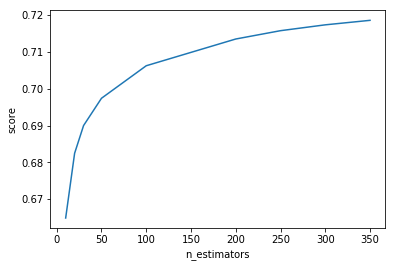

In [10]:
scores = []
estimators = [10, 20, 30, 50, 100, 200, 250, 300, 350]
for n in estimators:
    print('estimators = %s' % n)
    model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    start_time = datetime.now()
    mean_cv_score = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc', n_jobs=-1))
    
    print('Time elapsed: %s, cv_score: %s' % (str(datetime.now() - start_time), mean_cv_score))
    scores.append(mean_cv_score)

plt.plot(estimators, scores)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

Кросс-валидация для градиентного бустинга с 30 деревьями заняла 0:00:18.09 (значение AUC-ROC = 0.69).

Использование количества деревьев более 30 штук позволяет увеличить показатель AUC-ROC (данная оценка приближается к значению 0.72).
Для ускорения процесса обучения модели можно:

- уменьшить глубину деревьев (max_depth)
- использовать только часть выборки
- использовать информацию от предыдущих запусков (warm_start)
- настроить n_iter_no_change и tol в случае, если валидационная оценка модели уже не изменяется

## Подход 2: логистическая регрессия

### Загружаем данные

In [11]:
df_train = pd.read_csv('data/features.csv', index_col='match_id')
df_test = pd.read_csv('data/features_test.csv', index_col='match_id')
heroes = pd.read_csv('data/data/dictionaries/heroes.csv')
n_heroes = len(heroes)
print('Количество героев в игре: %s' % n_heroes)

Количество героев в игре: 112


In [12]:
print(df_train.head(15))

          start_time  lobby_type  r1_hero  r1_level  r1_xp  r1_gold  r1_lh  \
match_id                                                                     
0         1430198770           7       11         5   2098     1489     20   
1         1430220345           0       42         4   1188     1033      9   
2         1430227081           7       33         4   1319     1270     22   
3         1430263531           1       29         4   1779     1056     14   
4         1430282290           7       13         4   1431     1090      8   
5         1430284186           1       11         5   1961     1461     19   
8         1430293701           1        8         3    967     1136      7   
9         1430299335           7       35         5   2117     1252     16   
11        1430308974           1       17         5   1527      906     10   
12        1430316105           7       15         5   1651     1060     14   
14        1430325079           1       22         5   1988     1

### Подготовка данных

In [13]:
target = 'radiant_win'
y_train = df_train[target]
X_train = get_sample(df_train)

# Заполняем пропуски
X_train.fillna(0, inplace=True)

# Масштабирование признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Генератор разбиений для кросс-валидации
kf = KFold(len(X_train), n_folds=5, shuffle=True, random_state=42)

### Обучение на полной выборке

c = 1e-06
Time elapsed: 0:00:03.846990
c = 1e-05
Time elapsed: 0:00:03.848173
c = 0.0001
Time elapsed: 0:00:04.594532
c = 0.001
Time elapsed: 0:00:05.539291
c = 0.01
Time elapsed: 0:00:06.355189
c = 0.1
Time elapsed: 0:00:06.676352
c = 1.0
Time elapsed: 0:00:06.750698
c = 10.0
Time elapsed: 0:00:06.771113
c = 100.0
Time elapsed: 0:00:07.060479
c = 1000.0
Time elapsed: 0:00:06.973764
c = 10000.0
Time elapsed: 0:00:06.863689
c = 100000.0
Time elapsed: 0:00:06.956600
c = 1000000.0
Time elapsed: 0:00:06.987849


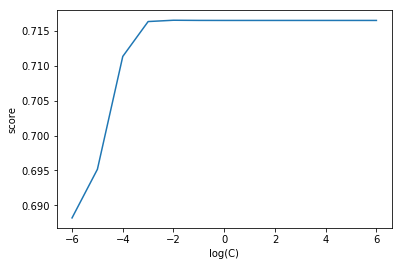

In [14]:
c, best_score = test_model(X_train, y_train)

In [15]:
c, best_score

(0.01, 0.7165502697259141)

Наилучшее значение AUC-ROC = 0.717 при C = 0.01. Это примерно соответствует результату градиентного бустинга с 250 деревьями, но логистическая регрессия обучается гораздо быстрее.

### Обучение на выборке без категориальных признаков

c = 1e-06
Time elapsed: 0:00:03.618203
c = 1e-05
Time elapsed: 0:00:03.730434
c = 0.0001
Time elapsed: 0:00:04.163224
c = 0.001
Time elapsed: 0:00:05.116920
c = 0.01
Time elapsed: 0:00:05.934209
c = 0.1
Time elapsed: 0:00:06.293265
c = 1.0
Time elapsed: 0:00:06.245014
c = 10.0
Time elapsed: 0:00:06.546687
c = 100.0
Time elapsed: 0:00:06.335709
c = 1000.0
Time elapsed: 0:00:06.557706
c = 10000.0
Time elapsed: 0:00:06.521616
c = 100000.0
Time elapsed: 0:00:06.969605
c = 1000000.0
Time elapsed: 0:00:06.491572


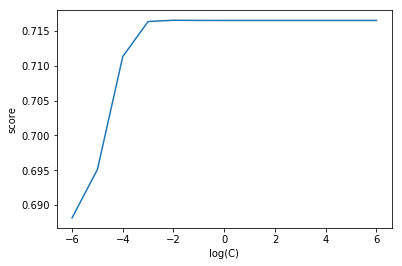

In [16]:
X_train = get_sample(df_train)

cat_features = ['lobby_type'] + ['r{}_hero'.format(n) for n in range(1, 6)] + ['d{}_hero'.format(n) for n in range(1, 6)]
X_train.drop(cat_features, axis=1, inplace=True)
X_train.fillna(0, inplace=True)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

c, best_score = test_model(X_train, y_train)

In [17]:
c, best_score

(0.01, 0.7165593885630225)

Удаление категориальных признаков почти не повлияло на качество предсказания (0.717), модель смогла распознать этот шум.

### Обучение на выборке с 'мешком слов' для героев

c:\python35\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


c = 1e-06
Time elapsed: 0:00:04.329418
c = 1e-05
Time elapsed: 0:00:04.651091
c = 0.0001
Time elapsed: 0:00:05.535299
c = 0.001
Time elapsed: 0:00:08.306715
c = 0.01
Time elapsed: 0:00:09.796097
c = 0.1
Time elapsed: 0:00:10.370862
c = 1.0
Time elapsed: 0:00:10.270211
c = 10.0
Time elapsed: 0:00:10.510522
c = 100.0
Time elapsed: 0:00:10.394890
c = 1000.0
Time elapsed: 0:00:10.059860
c = 10000.0
Time elapsed: 0:00:10.190326
c = 100000.0
Time elapsed: 0:00:10.191820
c = 1000000.0
Time elapsed: 0:00:10.083288


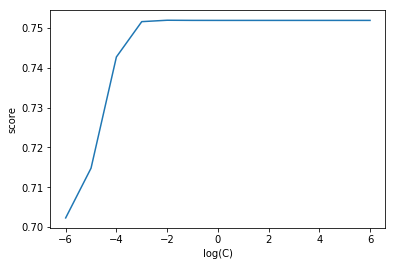

In [18]:
X_train = get_sample(df_train)
X_test = df_test.copy()

cat_features = ['lobby_type'] + ['r{}_hero'.format(n) for n in range(1, 6)] + ['d{}_hero'.format(n) for n in range(1, 6)]
X_train_hero = heroes_bag(X_train, n_heroes)
X_test_hero = heroes_bag(X_test, n_heroes)

X_train.drop(cat_features, axis=1, inplace=True)
X_test.drop(cat_features, axis=1, inplace=True)

X_train_final = pd.concat([X_train, X_train_hero], axis=1)
X_train_final.fillna(0, inplace=True)

X_test_final = pd.concat([X_test, X_test_hero], axis=1)
X_test_final.fillna(0, inplace=True)

scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_final)
X_test_final = scaler.transform(X_test_final)

c, best_score = test_model(X_train_final, y_train)

In [19]:
c, best_score

(0.01, 0.7519640431617559)

При добавлении 'мешка слов' по героям качество заметно улучшилось, и теперь AUC-ROC = 0.752 при C = 0.01.

### Применение наилучшей модели к тестовой выборке

In [20]:
model = LogisticRegression(C=0.01, random_state=42, n_jobs=-1)
model.fit(X_train_final, y_train)

y_test = model.predict_proba(X_test_final)[:, 1]
result = pd.DataFrame({'radiant_win': y_test}, index=X_test.index)
print(result['radiant_win'].nunique(), result['radiant_win'].min(), result['radiant_win'].max())

# сохраняем результат
result.to_csv('data/result.csv')

c:\python35\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


17177 0.008490951947240609 0.9962776240356744
